<a href="https://colab.research.google.com/github/Sam-Joshua-S/100DaysOfData/blob/main/Day%2014-linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/AVKuzminov/data/master/SAT_GPA.csv",sep=" ")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   high_GPA  105 non-null    float64
 1   math_SAT  105 non-null    int64  
 2   verb_SAT  105 non-null    int64  
 3   comp_GPA  105 non-null    float64
 4   univ_GPA  105 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.2 KB


In [4]:
df.describe()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,3.076381,623.076190,598.600000,3.128000,3.172857
std,0.516598,53.760454,62.963604,0.509046,0.447194
min,2.030000,516.000000,480.000000,2.030000,2.080000
25%,2.670000,573.000000,548.000000,2.870000,3.010000
50%,3.170000,612.000000,591.000000,3.210000,3.290000
75%,3.480000,675.000000,645.000000,3.490000,3.470000
max,4.000000,718.000000,732.000000,4.000000,3.810000


In [5]:
df=df.drop(['math_SAT','verb_SAT','comp_GPA'],axis=1)

In [6]:
df

,high_GPA,univ_GPA
0,3.45,3.52
1,2.78,2.91
2,2.52,2.40
3,3.67,3.47
4,3.24,3.47
...,...,...
100,3.76,3.64
101,3.49,3.42
102,3.07,3.25
103,2.19,2.76


In [7]:
Y=df.high_GPA
x=df.univ_GPA

##Viz

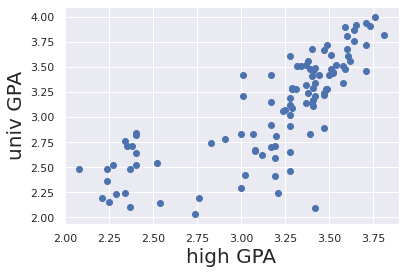

In [8]:
plt.scatter(x,Y)
plt.xlabel("high GPA",fontsize=20)
plt.ylabel("univ GPA",fontsize=20)
plt.show()

##Regression

In [9]:
x = sm.add_constant(x)
result = sm.OLS(Y,x).fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               high_GPA   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     159.6
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           1.18e-22
Time:                        06:31:33   Log-Likelihood:                -30.006
No. Observations:                 105   AIC:                             64.01
Df Residuals:                     103   BIC:                             69.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2191      0.228      0.959      0.340      -0.234       0.672
univ_GPA       0.9006      0.071     12.632      0.000       0.759       1.042
==============================================================================
Omnibus:                       17.230   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.223
Skew:                          -0.936   Prob(JB):                     4.06e-05
Kurtosis:                       4.057   Cond. No.                         25.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

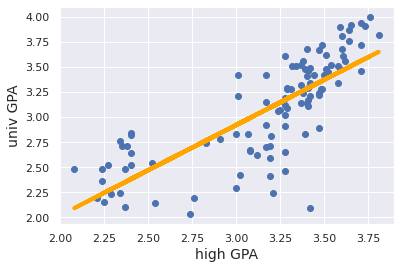

In [14]:
plt.scatter(x.univ_GPA,Y)
yhat=.9006*x.univ_GPA+.2191
fig = plt.plot(x.univ_GPA,yhat,lw=4,c='orange',label='Regression')
plt.xlabel("high GPA",fontsize=14)
plt.ylabel("univ GPA",fontsize=14)
plt.show()